# activation function

## good activation function

A good activation function should have the following key properties:

- Nonlinearity: It should introduce nonlinearity into the model, which allows the neural network to learn complex, non-linear relationships between input features and output targets.

- Continuously differentiable: Iensures gradients can be computed during backpropagation for updating weights.

- Monotonicity: smooth loss landscape, improve convergence.

- Computational efficiency: both in its original form and its derivative, to ensure efficient training and inference.

- non-saturated: no vanishing gradient problem

## common activation functions

| Activation Function | formula| derivative |Pros                                                 | Cons                                                      |
|---------------------|:---------------------:|:---------------------:|------------------------------------------------------|-----------------------------------------------------------|
| Step                | $$f(x)= \left\{\begin{matrix}1 & x > 0 \\0 &  x < 0\\\end{matrix}\right.$$| Undefined at 0, 0 elsewhere |Simple and easy to understand                        | Non-differentiable, can't be used with gradient-based optimization. Saturated everywhere except at the transition point. |
| Sigmoid             | $$f(x) = \frac{1}{1 + e^{-x}}$$| $$f'(x) = f(x)(1 - f(x))$$ |Smooth, differentiable, outputs in range (0, 1), good for binary classification     | Vanishing gradient problem, Saturated when input are too large (positive) or too small (negative). non-zero centered, computationally expensive |
| ReLU                | $$f(x) = \max(0, x)$$| $$f'(x)= \left\{\begin{matrix}1 & x \geq 0 \\0 &  x < 0\\\end{matrix}\right.$$ |Computationally efficient, mitigates vanishing gradient problem. Non-saturated for positive input values, but saturated for negative input values. | Non-differentiable at 0, dying ReLU problem (neurons become inactive) |
| Leaky ReLU          | $$f(x)= \left\{\begin{matrix}x & x > 0 \\ \alpha x  &  x < 0\\\end{matrix}\right.$$ <br>$\alpha <0$ | $$f'(x)= \left\{\begin{matrix}1 & x > 0 \\\alpha &  x < 0\\\end{matrix}\right.$$ |Addresses dying ReLU problem, computationally efficient | Non-differentiable at 0, may not always outperform ReLU |
| ELU                 | $$f(x)= \left\{\begin{matrix}x & x > 0 \\\alpha(e^x - 1) &  x < 0\\\end{matrix}\right.$$| $$f'(x)= \left\{\begin{matrix}1 & x > 0 \\\alpha e^x &  x < 0\\\end{matrix}\right.$$ |Non-saturated, Smooth, non-zero centered, addresses dying ReLU problem | Computationally more expensive than ReLU and Leaky ReLU |
| Tanh                | $$f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}\\[1em]=2\text{sigmoid}(2x)-1$$| $$f'(x) = 1 - f(x)^2$$ |Smooth, differentiable, outputs in range (-1, 1)     | Vanishing gradient problem,Saturated when input are too large (positive) or too small (negative). computationally expensive |
| Swish               | $$f(x) = x \cdot \frac{1}{1 + e^{-x}}$$| $$f'(x) = f(x) + \sigma(x)(1 - f(x))$$ |Non-saturated, Smooth, non-monotonic, self-gated                    | Computationally more expensive than ReLU, limited improvement over ReLU |
| Softmax             |$$f_i(x) = \frac{e^{x_i}}{\sum_{j=1}^{n} e^{x_j}}$$ |$$f'_i(x) = f_i(x)(1 - f_i(x))$$ if $i=j$ <br> $$f'_i(x) = f_i(x)f_j(x)$$ if $i\neq j$|Converts input to probability distribution over classes | Computationally expensive, only suitable for output layers in multi-class classification |


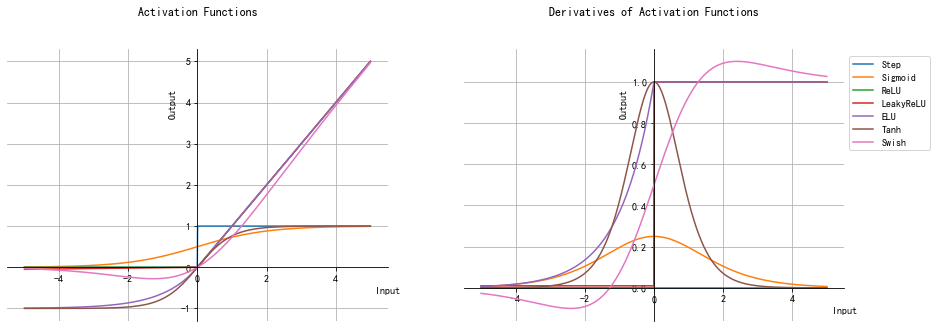

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define activation functions and their derivatives
def step(x):
    return np.where(x >= 0, 1, 0)

def step_derivative(x):
    return np.where(x == 0, np.nan, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1 - sx)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x >= 0, 1, 0)

def leakyrelu(x, alpha=0.01):
    return np.maximum(alpha*x, x)

def leakyrelu_derivative(x, alpha=0.01):
    return np.where(x >= 0, 1, alpha)

def elu(x, alpha=1.0):
    return np.where(x >= 0, x, alpha * (np.exp(x) - 1))

def elu_derivative(x, alpha=1.0):
    return np.where(x >= 0, 1, alpha * np.exp(x))

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.square(tanh(x))

def swish(x):
    return x / (1 + np.exp(-x))

def swish_derivative(x):
    sx = sigmoid(x)
    return sx + x * sx * (1 - sx)

# Plot derivatives of activation functions
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

x = np.linspace(-5, 5, 1000)

ys = [step(x), sigmoid(x), relu(x), leakyrelu(x), elu(x), tanh(x), swish(x)]
yprimes = [step_derivative(x), sigmoid_derivative(x), relu_derivative(x), 
           leakyrelu_derivative(x), elu_derivative(x), tanh_derivative(x), swish_derivative(x)]
labels = ['Step', 'Sigmoid', 'ReLU', 'LeakyReLU', 'ELU', 'Tanh', 'Swish']
for y, yprime, label in zip(ys, yprimes, labels):
    ax1.plot(x, y, label=label)
    ax2.plot(x, yprime, label=label)

for ax in [ax1, ax2]:
    ax.set_xlabel('Input', x=1)
    ax.set_ylabel('Output', y=0.8)
    # Move left y-axis and bottom x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    # Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    # show grid
    ax.grid()

# Add labels and legend
ax1.set_title('Activation Functions', y=1.1)
ax2.set_title('Derivatives of Activation Functions', y=1.1)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))
plt.show()


## sigmoid

- sigmoid function

    $$
    \sigma(z) = \frac{1}{1+ e^{-z}} \in (0, 1)
    $$

- **properties of sigmoid function**

    1. $\sigma(z) \in (0, 1)$, can be interpreted as a probability
    
    2. $\sigma(-z)=1-\sigma(z)$

    3. derivative of sigmoid function $\sigma'(z)=\sigma(z)[1-\sigma(z)]=\frac{\exp(z)}{(1+\exp(z))^2}$

    4. $\sigma(0)=0.5$, approximately linear aound $y$-axis.

    5.  $\sigma \to 1$ as $x \to +\infty$; $\sigma \to 0$ as $x \to -\infty$

- a sigmoid neuron is a continuous version of step neuron,
    
- sigmoid function still looks like a step, but don't have hard threshold 0, it gives intermediate value between 0 and 1
    
- smoothness and ease of differentiability of sigmoid function give **tunability**,

    small changes to weights and biases $\to$ small changes in output

    we can change multiple sigmoids on neuron and learn by gradient descent

## softmax


\begin{align}

\text{softmax}(\mathbf{x})&=\frac{e^{\mathbf{x}}}{\boldsymbol{1}^T e^{\mathbf{x}}} \in \mathbb{R}^{C}\\[1em]

\text{softmax}(\mathbf{x}_i)&=P(y=i|\mathbf{x}_i)= \frac{e^{\mathbf{x}_i}}{\sum_{j=1}^{n} e^{\mathbf{x}_j}} \in [0, 1]
\end{align}

softmax function is typically used as activation function for output layer of a neural network for multi-class classification tasks.

- convert a output vector of real numbers into a vector of N values between 0 and 1 that add up to 1., which can be interpretated as a probability distribution over the N classes

- an entry of output vector is probability of the input vector belonging to each of the N classes, the class with the highest probability is chosen as  predicted class for the input.

why called 'softmax'?

- max: amplify probability of largest $\mathbf{x}_i$

- soft: still asign some probability to smaller $\mathbf{x}_i$

- sigmoid is softmax when there is only 2 classes and logit of class 0 is always 0

    $$
    \text{softmax}(z)=\frac{e^z}{e^z+e^0}=\sigma(z)
    $$